# US Car Accident Data Analysis

## 1.Introduction/Abstract

#待补充

## 2.Data Cleaning & Description

### 2.1 Preliminary Data Cleaning

#### 2.1.1 Import data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')

In [3]:
pd.set_option('display.max_columns',50)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


#### 2.1.2 Drop unrelated attributes

- Drop attributes has no impact on severity or unhelpful for our analysis

In [6]:
del df['ID']
del df['Airport_Code']
del df['Weather_Timestamp']
del df['Number']
del df['Description']
del df['Country']
del df['Street']

- Drop 'Wind_Chill(F)' because of high relation with 'Temperature(F)'

In [7]:
df1 = pd.concat([df['Temperature(F)'], df['Wind_Chill(F)']], axis = 1)
print(df1['Temperature(F)'].corr(df1['Wind_Chill(F)']))
print(len(df[df['Wind_Chill(F)'].isnull()])/len(df))
del df['Wind_Chill(F)']

0.9926687857824973
0.2963700740865821


- Drop columns which have similar meanings

In [8]:
del df['Sunrise_Sunset']
del df['Nautical_Twilight']
del df['Astronomical_Twilight']

#### 2.1.3 Drop data with NaN values

In [9]:
df = df.dropna()

- After drop NaN, the attribute 'Turning_Loop' only have False value, so we drop it

In [10]:
del df['Turning_Loop']

#### 2.1.4 Convert time to datetime type

In [11]:
import datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

#### 2.1.5 Unified the form of Zipcode

In [12]:
#convert 11111-3333 to 11111
df['Zipcode'] = df['Zipcode'].apply(lambda x: str(x)[:5])

#### 2.1.6 Remove Outliers

- Drop data with 'Pressure(in)' larger than 31.85, which is the highest air pressure value ever recorded

In [13]:
df = df.drop(df[df['Pressure(in)'] > 31.85].index)

- Drop data with 'Wind_Speed(mph)' higher than 253, which is the highest wind speed value ever recorded

In [14]:
df = df.drop(df[df['Wind_Speed(mph)'] > 253].index)

#### 2.1.7 Covert boolean value to 0/1

In [15]:
Covertedlist = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]
for i in Covertedlist:
    df[i] = np.where(df[i] == True, 1, 0)

In [16]:
df["Side"] = np.where(df["Side"] == "L", 1, 0)
df.rename(columns={"Side":"Left_Side"}, inplace = True)

In [17]:
df["Civil_Twilight"] = np.where(df["Civil_Twilight"] == "Day", 0, 1)
df.rename(columns={"Civil_Twilight":"Night"}, inplace = True)

### 2.2 Data Description

#### 2.2.1 Location

- Add 'Vehicles Per Capita' attribute to express the feature of the 'State'

In [18]:
vehicle_population = pd.read_csv("Registered Vehicles and Population.csv")
vehicle_population['Vehicles Per Capita'] = vehicle_population['Register Vehicle']/vehicle_population['Population']
df = df.merge(vehicle_population, how = 'left', left_on="State", right_on="State_Postal_Code")

#### 2.2.2 Time

- Add 'Weekday' attribute to express the feature of the time

In [19]:
df['Weekday'] = df['Start_Time'].apply(lambda x: x.weekday()+1)
df['Weekday'] = np.where(df['Weekday'] <= 5, 1, 0)

#### 2.2.3 Weather

- Covert Visibility and Precipitation to boolean

In [20]:
df["Visibility(mi)"] = np.where(df["Visibility(mi)"] >= 10, 0, 1)
df.rename(columns={"Visibility(mi)":'Poor_Visibility'}, inplace = True)
df["Precipitation(in)"] = np.where(df["Precipitation(in)"] == 0, 0, 1)
df.rename(columns={"Precipitation(in)": "Precipitation"}, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976571 entries, 0 to 976570
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Severity             976571 non-null  int64         
 1   Start_Time           976571 non-null  datetime64[ns]
 2   End_Time             976571 non-null  datetime64[ns]
 3   Start_Lat            976571 non-null  float64       
 4   Start_Lng            976571 non-null  float64       
 5   End_Lat              976571 non-null  float64       
 6   End_Lng              976571 non-null  float64       
 7   Distance(mi)         976571 non-null  float64       
 8   Left_Side            976571 non-null  int64         
 9   City                 976571 non-null  object        
 10  County               976571 non-null  object        
 11  State_x              976571 non-null  object        
 12  Zipcode              976571 non-null  object        
 13  Timezone      

## 3. Model Prediction

### 3.1 Data Preprocessing

#### 3.1.1 Extract related variables and group severity

- Extract 23 related variables to predict severity

In [22]:
df_model = df[["Severity", "Distance(mi)", "Vehicles Per Capita", "Temperature(F)", "Humidity(%)", "Pressure(in)", "Poor_Visibility", "Wind_Speed(mph)", "Precipitation", "Amenity", "Bump", "Crossing", "Give_Way", "Junction","No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Left_Side", "Night", "Weekday"]]

- Because the severity is not clearly defined nor widely accepted, covert Severity 1,2,3 to Severity 0, which means slight; and Severity 4 to Severity 1, which means sever

In [23]:
df_model['Severity'] = np.where(df_model['Severity'] == 4, 1, 0)

/var/folders/zf/453dlclj5wsdhvjvhznv_t7c0000gn/T/ipykernel_32252/4148406695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Severity'] = np.where(df_model['Severity'] == 4, 1, 0)


In [24]:
df_model.describe()

,Severity,Distance(mi),Vehicles Per Capita,Temperature(F),Humidity(%),Pressure(in),Poor_Visibility,Wind_Speed(mph),Precipitation,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Left_Side,Night,Weekday
count,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000,976571.000000
mean,0.050503,0.543633,0.823484,58.741501,66.067378,29.358230,0.219227,7.204470,0.098597,0.008927,0.000228,0.065703,0.002163,0.112414,0.001221,0.008824,0.000049,0.021357,0.013325,0.000372,0.123447,0.160874,0.413730,0.798165
std,0.218981,1.584796,0.104135,17.693945,23.360300,1.132417,0.413723,5.618849,0.298120,0.094061,0.015110,0.247763,0.046454,0.315875,0.034916,0.093519,0.007011,0.144573,0.114663,0.019276,0.328950,0.367415,0.492502,0.401370
min,0.000000,0.000000,0.508253,-27.000000,1.000000,19.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.790305,47.000000,50.000000,29.190000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.094000,0.816851,59.000000,70.000000,29.740000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.528000,0.882331,72.000000,86.000000,29.970000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,155.186000,1.753147,113.000000,100.000000,31.100000,1.000000,232.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.1.2 Standardization

- Perform standardization to augment the reliability, consistency, and efficiency of the modeling

In [25]:
Covertedlist = ["Distance(mi)", "Vehicles Per Capita", "Temperature(F)", "Humidity(%)", "Pressure(in)", "Wind_Speed(mph)"]
for item in Covertedlist:
    mean = np.mean(np.array(df[item]))
    std = np.std(np.array(df[item]))
    df_model[item] = df_model[item].apply(lambda x: (x - mean) / std)

/var/folders/zf/453dlclj5wsdhvjvhznv_t7c0000gn/T/ipykernel_32252/159308697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[item] = df_model[item].apply(lambda x: (x - mean) / std)


#### 3.1.3 Resampling

- Split the dataset to training set and testing set

In [26]:
from sklearn.utils.validation import column_or_1d
from sklearn.model_selection import train_test_split
X = df_model.iloc[0:, 1:]
y = df_model[["Severity"]]
y = column_or_1d(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

- Resample data with Naive random over-sampling

In [27]:
!pip install imbalanced-learn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=0)
X_ROS, y_ROS = ROS.fit_resample(X_train, y_train)
print(sorted(Counter(y_ROS).items()))

[(0, 649250), (1, 649250)]


- Resample data with SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_SMOTE).items()))

[(0, 649250), (1, 649250)]


### 3.2 Model Training

#### 3.2.1 Logistic Regression

- Logistic Regression with Naive random over-sampling

In [29]:
from sklearn.linear_model import LogisticRegression
logisticregression_ROS = LogisticRegression(max_iter = 1000)
logisticregression_ROS.fit(X_ROS, y_ROS)
y_pred_logistic_ROS = logisticregression_ROS.predict(X_test)

- Logistic Regression with SMOTE

In [30]:
from sklearn.linear_model import LogisticRegression
logisticregression_SMOTE = LogisticRegression(max_iter = 1000)
logisticregression_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred_logistic_SMOTE = logisticregression_SMOTE.predict(X_test)

#### 3.2.2 Random Forest

- Random Forest with Naive random over-sampling

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
randomforest_ROS = RandomForestClassifier()
parameters = {
     'n_estimators':(5, 10, 12),
     'max_depth':(30, 50, 100),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4, 8, 12)
}

randomforest_ROS_search = GridSearchCV(randomforest_ROS, parameters, cv = 3, verbose = 4)
randomforest_ROS_search.fit(X_ROS, y_ROS)
best_parameters = randomforest_ROS_search.best_params_
randomforest_ROS = RandomForestClassifier(n_estimators = best_parameters['n_estimators'],
                                         max_depth = best_parameters['max_depth'],
                                         min_samples_split = best_parameters['min_samples_split'],
                                         min_samples_leaf = min_samples_leaf['min_samples_leaf'])
randomforest_ROS.fit(X_ROS, y_ROS)
y_pred_rf_ROS = randomforest_ROS.predict(X_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.934 total time=   5.9s
[CV 2/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.930 total time=   5.4s
[CV 3/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.927 total time=   5.6s


KeyboardInterrupt: 

- Random Forest with SMOTE

In [32]:
randomforest_SMOTE = RandomForestClassifier()
parameters = {
     'n_estimators':(5, 10, 12),
     'max_depth':(30, 50, 100),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4, 8, 12)
}

randomforest_SMOTE_search = GridSearchCV(randomforest_SMOTE, parameters, cv = 3, verbose = 4)
randomforest_SMOTE_search.fit(X_SMOTE, y_SMOTE)
best_parameters = randomforest_ROS_search.best_params_
randomforest_SMOTE = RandomForestClassifier(n_estimators = best_parameters['n_estimators'],
                                         max_depth = best_parameters['max_depth'],
                                         min_samples_split = best_parameters['min_samples_split'],
                                         min_samples_leaf = min_samples_leaf['min_samples_leaf'])
randomforest_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred_rf_SMOTE = randomforest_SMOTE.predict(X_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.891 total time=   7.4s
[CV 2/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.908 total time=   6.8s
[CV 3/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.904 total time=   6.9s
[CV 1/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.901 total time=  13.1s
[CV 2/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.918 total time=  13.3s
[CV 3/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.921 total time=  13.4s
[CV 1/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=12;, score=0.905 total time=  16.7s
[CV 2/3] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=12;, score=0.921 total time=  16.3s
[CV 3

KeyboardInterrupt: 

#### 3.2.3 Neural Network

- Neural Network with Naive random over-sampling

In [33]:
from sklearn.neural_network import MLPClassifier
MLP_ROS = MLPClassifier(activation = 'relu')
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'hidden_layer_sizes': ((30,),(60,)),
    'max_iter': (500, 1000)
}
MLP_ROS_search = GridSearchCV(MLP_ROS, param_grid = parameters, cv = 3, verbose = 4)
MLP_ROS_search.fit(X_ROS, y_ROS)
best_parameters = MLP_ROS_search.best_params_
MLP_ROS = MLPClassifier(activation = 'relu',
                       learning_rate = best_parameters['learning_rate'],
                       solver = best_parameters['solver'],
                       hidden_layer_sizes = best_parameters['hidden_layer_sizes'],
                       max_iter = best_parameters['max_iter'])
MLP_ROS.fit(X_ROS, y_ROS)
y_pred_NN_ROS = MLP_ROS.predict(X_ROS)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END hidden_layer_sizes=(30,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.726 total time= 3.4min


/Users/daisydai/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 2/3] END hidden_layer_sizes=(30,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.718 total time= 1.0min


/Users/daisydai/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 3/3] END hidden_layer_sizes=(30,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.678 total time=   6.9s


KeyboardInterrupt: 

- Neural Network with SMOTE

In [34]:
MLP_SMOTE = MLPClassifier(activation = 'relu')
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'hidden_layer_sizes': ((30,),(60,)),
    'max_iter': (500, 1000)
}
MLP_SMOTE_search = GridSearchCV(MLP_SMOTE, param_grid = parameters, cv = 3, verbose = 4)
MLP_SMOTE_search.fit(X_SMOTE, y_SMOTE)
best_parameters = MLP_SMOTE_search.best_params_
MLP_SMOTE = MLPClassifier(activation = 'relu',
                       learning_rate = best_parameters['learning_rate'],
                       solver = best_parameters['solver'],
                       hidden_layer_sizes = best_parameters['hidden_layer_sizes'],
                       max_iter = best_parameters['max_iter'])
MLP_SMOTE.fit(X_ROS, y_ROS)
y_pred_NN_SMOTE = MLP_ROS.predict(X_ROS)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END hidden_layer_sizes=(30,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.748 total time= 3.2min
[CV 2/3] END hidden_layer_sizes=(30,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.761 total time= 4.3min


/Users/daisydai/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 3/3] END hidden_layer_sizes=(30,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.742 total time=  50.4s


KeyboardInterrupt: 

#### 3.2.4 K-Nearest Neighbors

- K-Nearest Neighbors with Naive random over-sampling

In [45]:
from sklearn.neighbors import KNeighborsClassifier
KNN_ROS = KNeighborsClassifier()
KNN_ROS.fit(X_ROS, y_ROS)
y_pred_KNN_ROS = KNN_ROS.predict(X_test)

KNeighborsClassifier()

- K-Nearest Neighbors with SMOTE

In [46]:
from sklearn.neighbors import KNeighborsClassifier
KNN_SMOTE = KNeighborsClassifier()
KNN_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred_KNN_SMOTE = KNN_ROS.predict(X_test)

KeyboardInterrupt: 

### 3.3 Model Evaluation

#### 3.3.1 Confusion metrix

- Logistic Regression with Naive random over-sampling

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
print(confusion_matrix(y_pred_logistic_ROS, y_test))
print(classification_report(y_pred_logistic_ROS, y_test))

[[198167   6943]
 [ 79834   8028]]
              precision    recall  f1-score   support

           0       0.71      0.97      0.82    205110
           1       0.54      0.09      0.16     87862

    accuracy                           0.70    292972
   macro avg       0.62      0.53      0.49    292972
weighted avg       0.66      0.70      0.62    292972



- Logistic Regression with SMOTE

In [56]:
print(confusion_matrix(y_pred_logistic_SMOTE, y_test))
print(classification_report(y_pred_logistic_SMOTE, y_test))

[[194758   6798]
 [ 83243   8173]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81    201556
           1       0.55      0.09      0.15     91416

    accuracy                           0.69    292972
   macro avg       0.62      0.53      0.48    292972
weighted avg       0.65      0.69      0.61    292972



- Random Forest with Naive random over-sampling

In [ ]:
print(confusion_matrix(y_pred_rf_ROS, y_test))
print(classification_report(y_pred_rf_ROS, y_test))

- Random Forest with SMOTE

In [ ]:
print(confusion_matrix(y_pred_rf_SMOTE, y_test))
print(classification_report(y_pred_rf_SMOTE, y_test))

 - Neural Network with Naive random over-sampling

In [ ]:
print(confusion_matrix(y_pred_NN_ROS, y_test))
print(classification_report(y_pred_NN_ROS, y_test))

- Neural Network with SMOTE

In [ ]:
print(confusion_matrix(y_pred_NN_SMOTE, y_test))
print(classification_report(y_pred_NN_SMOTE, y_test))

- K-Nearest Neighbors with Naive random over-sampling

In [ ]:
print(confusion_matrix(y_pred_KNN_ROS, y_test))
print(classification_report(y_pred_KNN_ROS, y_test))

- K-Nearest Neighbors with SMOTE

In [ ]:
print(confusion_matrix(y_pred_KNN_SMOTE, y_test))
print(classification_report(y_pred_KNN_SMOTE, y_test))

#### 3.3.2 ROC curve

- Logistic Regression with Naive random over-sampling

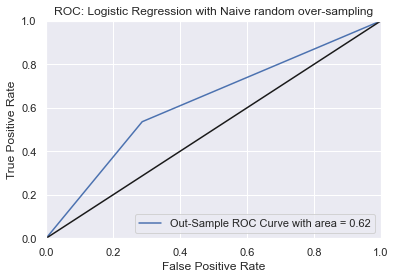

In [63]:
from sklearn.metrics import roc_curve, auc
(fpr, tpr, thresholds) = roc_curve(y_test, y_pred_logistic_ROS)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Logistic Regression with Naive random over-sampling')
plt.legend(loc="lower right")
plt.show()

- Logistic Regression with SMOTE

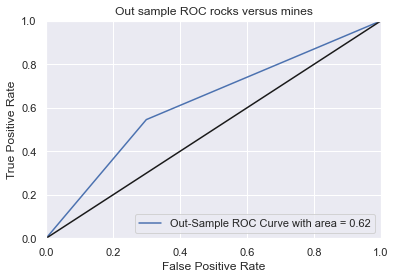

In [60]:
(fpr, tpr, thresholds) = roc_curve(y_test, y_pred_logistic_SMOTE)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()

- Random Forest with Naive random over-sampling

- Random Forest with SMOTE

- Neural Network with Naive random over-sampling

- Neural Network with SMOTE

- K-Nearest Neighbors with Naive random over-sampling

- K-Nearest Neighbors with SMOTE

#### 3.3.3 Feature Importance

- Compute feature importance Of the best performance model, random forest